卷积神经网络（LeNet）

LeNet(LeNet-5) 由两部分组成：卷积编码器和全连接层密集块

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 28, 28)

这段代码定义了一个名为`Reshape`的`torch.nn.Module`子类。这个类只有一个方法`forward`，它接受输入`x`，并将其重新调整为特定的形状。让我们逐步解释这段代码：

```python
class Reshape(torch.nn.Module):
```
这里定义了一个名为`Reshape`的类，它继承自`torch.nn.Module`，因此它是一个PyTorch的模型类。

```python
    def forward(self, x):
```
这个类中唯一的方法是`forward`，这是PyTorch中所有模型类必须实现的方法。`forward`方法接受一个输入张量`x`作为参数。

```python
        return x.view(-1, 1, 28, 28)
```
在这行代码中，`x.view(-1, 1, 28, 28)`的作用是将输入张量`x`重新调整为指定的形状。具体来说：

- `.view()`方法用于调整张量的形状。
- 第一个参数`-1`表示该维度的大小由张量本身和其他指定维度来推断，这里表示第一个维度的大小由其他维度和张量元素的总数来确定。
- 接下来的两个参数`1, 28`表示在重塑后的张量中的每个维度的大小，这里是将输入张量变成了一个形状为`(batch_size, 1, 28, 28)`的四维张量。其中`batch_size`是批处理大小，通常是训练时一次传递给模型的样本数目。这个值是根据输入张量的第一个维度推断出来的，因为我们将第一个维度设为了`-1`，所以PyTorch会根据输入张量的大小自动确定`batch_size`的大小。

综上所述，这段代码的作用是将输入张量`x`重新调整为形状为`(batch_size, 1, 28, 28)`的四维张量，其中`batch_size`是输入张量的第一个维度的大小。通常在深度学习中，数据输入到神经网络前需要保持一致的形状，因此这个`Reshape`模块的作用是确保输入数据具有指定的形状。

In [3]:
net = torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 19)
)

好的，让我们来计算一下每一层特征图的大小：

1. 输入图像大小为 28x28。
2. 第一个卷积层的输出特征图大小计算公式为：\[ \text{output\_size} = \frac{{\text{input\_size} + 2 \times \text{padding} - \text{kernel\_size}}}{{\text{stride}}} + 1 \] 
   对于第一个卷积层：\[\text{output\_size} = \frac{{28 + 2 \times 2 - 5}}{1} + 1 = 28\]
   输出特征图大小为 28x28。
3. 第一个池化层使用了2x2的池化核，stride为2，因此特征图大小会减半。
   输出特征图大小为 14x14。
4. 第二个卷积层的输出特征图大小计算同样地：
   \[\text{output\_size} = \frac{{\text{input\_size} - \text{kernel\_size}}}{{\text{stride}}} + 1\]
   对于第二个卷积层：\[\text{output\_size} = \frac{{14 - 5}}{1} + 1 = 10\]
   输出特征图大小为 10x10。
5. 第二个池化层同样使用了2x2的池化核，stride为2，因此特征图大小会减半。
   输出特征图大小为 5x5。

因此，每一层特征图的大小依次为：

1. 第一个卷积层输出：28x28
2. 第一个池化层输出：14x14
3. 第二个卷积层输出：10x10
4. 第二个池化层输出：5x5

这段代码定义了一个神经网络模型`net`，它是一个由多个层组成的序列模型。让我们逐步解释每一层的作用：

1. `Reshape()`: 这是一个自定义的模块，用于将输入张量重新塑形为指定的形状。在这里，它将输入张量重新塑形为4维张量，大小为(-1, 1, 28, 28)，其中-1表示维度的大小由输入张量的总元素数和其他维度的大小推断而来，1表示通道数，而后两个维度表示图像的高度和宽度。

2. `nn.Conv2d(1, 6, kernel_size=5, padding=2)`: 这是一个2D卷积层，输入通道数为1，输出通道数为6，卷积核大小为5x5，padding为2。这一层的作用是提取输入图像的特征。

3. `nn.Sigmoid()`: 这是一个Sigmoid激活函数，用于引入非线性。

4. `nn.AvgPool2d(2, stride=2)`: 这是一个2x2的平均池化层，步幅为2。它将输入特征图的每个2x2的区域取平均值，从而将特征图的尺寸减半。

5. `nn.Conv2d(6, 16, kernel_size=5)`: 这是另一个2D卷积层，输入通道数为6，输出通道数为16，卷积核大小为5x5。类似地，这一层也用于提取特征。

6. `nn.Sigmoid()`: 再次使用Sigmoid激活函数引入非线性。

7. `nn.AvgPool2d(kernel_size=2, stride=2)`: 这是另一个2x2的平均池化层，步幅为2，将特征图的尺寸减半。

8. `nn.Flatten()`: 这一层将特征图展平成一维向量，以便传递给全连接层。

9. `nn.Linear(16 * 5 * 5, 120)`: 这是一个全连接层，将展平的特征向量映射到大小为120的向量。

10. `nn.Sigmoid()`: 再次使用Sigmoid激活函数。

11. `nn.Linear(120, 84)`: 这是另一个全连接层，将大小为120的向量映射到大小为84的向量。

12. `nn.Sigmoid()`: 再次使用Sigmoid激活函数。

13. `nn.Linear(84, 19)`: 这是最后一个全连接层，将大小为84的向量映射到大小为19的向量，即最终的输出。

通过这些层的组合，该神经网络模型能够从输入的图像中提取特征，并对图像进行分类，输出19个类别中的一个。

检查模型

In [4]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)

In [5]:
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, "output shape \t", X.shape)

Reshape output shape 	 torch.Size([1, 1, 28, 28])
Conv2d output shape 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape 	 torch.Size([1, 6, 14, 14])
Conv2d output shape 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape 	 torch.Size([1, 16, 5, 5])
Flatten output shape 	 torch.Size([1, 400])
Linear output shape 	 torch.Size([1, 120])
Sigmoid output shape 	 torch.Size([1, 120])
Linear output shape 	 torch.Size([1, 84])
Sigmoid output shape 	 torch.Size([1, 84])
Linear output shape 	 torch.Size([1, 19])


LeNet在Fashion-MNIST数据集上的表现

In [6]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size = batch_size)

对evaluate_accuracy函数进行轻微的修改

In [7]:
def evaluate_accuracy(net, data_iter, device=None):
    """使用GPU计算模型上的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
        

这段代码定义了一个函数 `evaluate_accuracy`，用于评估模型在给定数据集上的准确率。让我逐步解释其功能和实现细节：

1. `def evaluate_accuracy(net, data_iter, device=None):`
   - 定义了一个函数 `evaluate_accuracy`，接受三个参数：
     - `net`：神经网络模型。
     - `data_iter`：数据迭代器，用于遍历数据集。
     - `device`：可选参数，指定计算设备，如果没有提供则根据模型的参数来确定。

2. `if isinstance(net, torch.nn.Module):`
   - 检查 `net` 是否为 `torch.nn.Module` 类型的对象，确保传入的模型是 PyTorch 中的神经网络模型。

3. `net.eval():`
   - 将模型设置为评估模式，这通常会关闭一些在训练时启用的特定于训练的层，比如 Dropout 和 Batch Normalization。

4. `if not device:`
   - 如果没有指定计算设备，那么通过检查模型的参数来选择一个设备。

5. `device = next(iter(net.parameters())).device`
   - 获取模型的第一个参数（通常是权重参数），然后获取该参数所在的设备。

6. `metric = d2l.Accumulator(2)`
   - 创建一个累加器对象 `metric`，用于计算准确率。

7. `for X, y in data_iter:`
   - 遍历数据迭代器，逐批次获取输入数据 `X` 和对应的标签 `y`。

8. `if isinstance(X, list):`
   - 检查输入数据 `X` 是否为列表类型，这通常用于处理多输入的情况，比如多输入的神经网络模型。

9. `X = [x.to(device) for x in X]`
   - 将输入数据 `X` 中的每个元素转移到指定的计算设备上。

10. `else: X = X.to(device)`
    - 如果输入数据 `X` 不是列表类型，那么直接将其转移到指定的计算设备上。

11. `y = y.to(device)`
    - 将标签数据 `y` 转移到指定的计算设备上。

12. `metric.add(d2l.accuracy(net(X), y), y.numel())`
    - 使用累加器 `metric` 计算模型在当前批次上的准确率，并将准确率和当前批次的样本数量添加到累加器中。

13. `return metric[0] / metric[1]`
    - 返回模型在整个数据集上的准确率，计算公式为累加器中累积的准确率之和除以累加器中累积的样本总数。

为了使用GPU，我们还需要一点小改动

In [8]:
def train(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU """
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on ', device)
    net.to(device)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(
        xlabel='epoch',
        xlim=[1, num_epochs],
        legend=['train loss', 'train acc', 'test acc'],
        
    )
    
    timer, num_batches = d2l.Timer(), len(train_iter)
    
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (train_l, train_acc, None)
                )
            
            test_acc = evaluate_accuracy(net, test_iter)
            animator.add(
                epoch + 1,
                (None, None, test_acc)
            )
            
        print(f'loss {train_l:.3f}, train_acc {train_acc:.3f}, test_acc {test_acc:.3f}')
        print(f'{metric[2] * num_epochs / timer.sum():.1f} example/sec on {str(device)}' )
        

这段代码定义了一个训练函数 `train`，用于训练神经网络模型。让我逐步解释其功能和实现细节：

1. `def train(net, train_iter, test_iter, num_epochs, lr, device):`
   - 定义了一个函数 `train`，接受六个参数：
     - `net`：神经网络模型。
     - `train_iter`：训练数据迭代器。
     - `test_iter`：测试数据迭代器。
     - `num_epochs`：训练的轮数。
     - `lr`：学习率。
     - `device`：计算设备。

2. `def init_weights(m):`
   - 定义了一个初始化权重的函数 `init_weights`，它接受一个模型 `m` 作为参数。
   - 在这个函数中，使用 Xavier 初始化方法初始化线性层和卷积层的权重参数。

3. `net.apply(init_weights)`
   - 对模型 `net` 应用上面定义的初始化权重的函数，这样模型的权重参数就会被初始化。

4. `print('training on ', device)`
   - 打印当前使用的计算设备。

5. `net.to(device)`
   - 将模型 `net` 移动到指定的计算设备上。

6. `optimizer = torch.optim.SGD(net.parameters(), lr=lr)`
   - 定义一个随机梯度下降（SGD）优化器，用于更新模型参数。
   - `lr` 参数指定了学习率。

7. `loss = nn.CrossEntropyLoss()`
   - 定义了交叉熵损失函数，用于计算模型预测值与真实标签之间的损失。

8. `animator = d2l.Animator(...)`
   - 创建了一个动画器对象，用于可视化训练过程中的损失和准确率变化。

9. `timer, num_batches = d2l.Timer(), len(train_iter)`
   - 创建了一个计时器对象 `timer`，用于计算每个 epoch 的训练时间。
   - `num_batches` 存储了训练集的批次数。

10. `for epoch in range(num_epochs):`
    - 开始迭代训练 `num_epochs` 轮次。

11. `metric = d2l.Accumulator(3)`
    - 创建了一个累加器对象 `metric`，用于存储训练过程中的损失值和准确率。

12. `net.train()`
    - 将模型设置为训练模式，这会启用一些特定于训练的层，如 Dropout 和 Batch Normalization。

13. `for i, (X, y) in enumerate(train_iter):`
    - 开始迭代每个训练批次。

14. `optimizer.zero_grad()`
    - 清空优化器中之前批次的梯度信息。

15. `X, y = X.to(device), y.to(device)`
    - 将输入数据 `X` 和标签数据 `y` 移动到指定的计算设备上。

16. `y_hat = net(X)`
    - 使用模型进行前向传播，得到预测结果 `y_hat`。

17. `l = loss(y_hat, y)`
    - 计算预测结果与真实标签之间的损失值。

18. `l.backward()`
    - 反向传播计算梯度。

19. `optimizer.step()`
    - 根据梯度更新模型参数。

20. `with torch.no_grad():`
    - 在无梯度的上下文中进行以下操作。

21. `metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])`
    - 使用累加器 `metric` 记录当前批次的损失值、准确率和样本数量。

22. `animator.add(...)`
    - 将训练过程中的损失值和准确率添加到动画器中进行可视化。

23. `test_acc = evaluate_accuracy(net, test_iter)`
    - 使用测试数据集评估当前模型在测试集上的准确率。

24. `animator.add(...)`
    - 将测试准确率添加到动画器中进行可视化。

25. `print(f'loss {train_l:.3f}, train_acc {train_acc:.3f}, test_acc {test_acc:.3f}')`
    - 打印当前轮次的训练损失、训练准确率和测试准确率。

26. `print(f'{metric[2] * num_epochs / timer.sum():.1f} example/sec on {str(device)}' )`
    - 打印每秒处理的样本数。

这样，这个函数就完成了对神经网络模型的训练过程，其中包括了前向传播、反向传播、参数更新以及性能评估。

训练评估LeNet-5模型

In [9]:
lr, num_epochs = 0.9, 10

loss 0.471, train_acc 0.823, test_acc 0.770
68664.5 example/sec on cuda:0


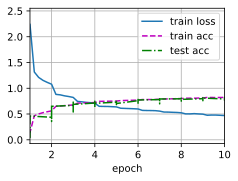

In [10]:
train(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())